$\frac{dS_t}{S_t} = \mu dt + \sigma dz_t$

$d(logS_t) = \frac{1}{S_t}dS_t-\frac{1}{2S_t^2}(dS_t)^2 = \mu dt + \sigma dz_t - \frac{\sigma ^2 S_t^2}{2S_t^2}(dS_t)^2 = (\mu - \frac{1}{2} \sigma ^2)dt + \sigma dz_t $

$log S_t = (\mu - \frac{1}{2} \sigma ^2)t + \sigma z_t +c$

$S_t = S_0e^{(\mu - \frac{1}{2} \sigma ^2)t + \sigma z_t}$

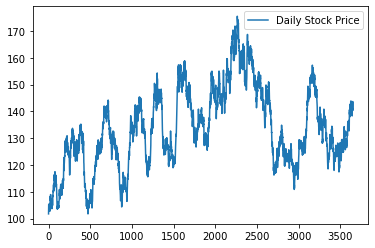

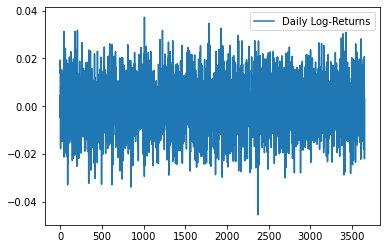

Annualized estimated mean log-return is 0.032634984609359347
Annualized estimated log-return std deviation is 0.20206652618172125


In [1]:
### problem 1

#(a)
import numpy as np

#(b)
import matplotlib.pyplot as plt

#(c)
#solve sde function first, then write its answer
mu = 0.06
sigma = 0.2
n = 365*10
dt = 10/(365.0*10)
dz = np.random.randn(n)*np.sqrt(dt)
S = []
S0 = 100
S = S0*np.exp(np.cumsum( mu*dt-0.5*sigma*sigma*dt+sigma*dz ))

#(d)
plt.plot(S, label='Daily Stock Price')
plt.legend()
plt.show()

#(e) 
logret = np.log(S[1:n]/S[0:n-1])

#(f)
plt.plot(logret, label='Daily Log-Returns')
plt.legend()
plt.show()

#(g) 
print('Annualized estimated mean log-return is', np.mean(logret)/dt)
print('Annualized estimated log-return std deviation is', np.std(logret)/np.sqrt(dt))

How many observations has your sample? 25933


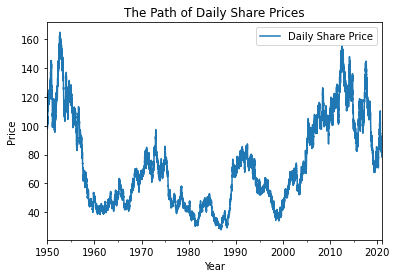

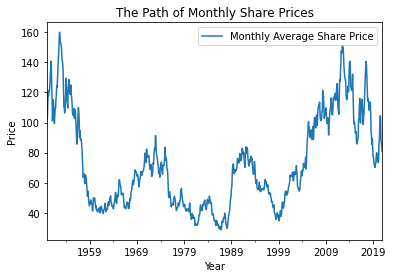

In [37]:
# problem 2

#(a)
import pandas as pd

#(b)
# reuse the function in problem 1
prng=pd.period_range('1950-01-01','2020-12-31',freq='D')

mu = 0.06
sigma = 0.20
n = len(prng)
dt = 10/(365.0*10)
dz = np.random.randn(n)*np.sqrt(dt)
S0 = 100
S = pd.Series(S0*np.exp(np.cumsum( mu*dt-0.5*sigma*sigma*dt+sigma*dz )),prng)
data = pd.DataFrame([1]*len(prng),index = prng, columns = ['S'])
data.S = S
#(c)
# 1.How many observations has your sample? 
n1=len(S)
print('How many observations has your sample?', n1)

# 2. Plot the path of daily share prices
S.plot(label='Daily Share Price')
plt.title('The Path of Daily Share Prices')
plt.ylabel('Price')
plt.xlabel('Year')
plt.legend()
plt.show()

#(d) 
# by the hint, Use s.resample(rule) function
S_month = S.resample('M').mean()

#(e)
S_month.plot(label='Monthly Average Share Price')
plt.title('The Path of Monthly Share Prices')
plt.ylabel('Price')
plt.xlabel('Year')
plt.legend()
plt.show()


In [38]:
# problem 3

#(a) log returns
logret_day = np.log(S.values[1:n]/S.values[0:n-1])
logret_day = pd.Series(logret_day)


S_week_prices = S.resample('W', convention = 'start').first()
logret_week = np.log(S_week_prices.values[1:len(S_week_prices)]/S_week_prices.values[0:len(S_week_prices)-1])
logret_week = pd.Series(logret_week)

S_month_prices = S.resample('M', convention = 'start').first()
logret_month = np.log(S_month_prices.values[1:len(S_month_prices)]/S_month_prices.values[0:len(S_month_prices)-1])
logret_month = pd.Series(logret_month)

In [39]:
#(b) Summary statistics
#daily summary statistics
logret_day.describe()

count    25932.000000
mean        -0.000009
std          0.010519
min         -0.041263
25%         -0.007157
50%         -0.000046
75%          0.007099
max          0.041645
dtype: float64

In [40]:
#Weekly summary statistics
logret_week.describe()

count    3705.000000
mean       -0.000066
std         0.027529
min        -0.101958
25%        -0.018853
50%         0.000022
75%         0.018686
max         0.093881
dtype: float64

In [41]:
#Monthly summary statistics
logret_month.describe()

count    851.000000
mean      -0.000249
std        0.058369
min       -0.172007
25%       -0.042304
50%        0.002269
75%        0.039944
max        0.177755
dtype: float64

In [42]:
#(c) Annualized mean and standard deviation of log-returns
print(f"The annualized mean for daily log-returns is {np.mean(logret_day)*365} and the the annualized std is {np.std(logret_day)*np.sqrt(365)}")
print(f"The annualized mean for weekly log-returns is {np.mean(logret_week)*52} and the the annualized std is {np.std(logret_week)*np.sqrt(52)}")
print(f"The annualized mean for monthly log-returns is {np.mean(logret_month)*12} and the the annualized std is {np.std(logret_month)*np.sqrt(12)}")


The annualized mean for daily log-returns is -0.003318245537741273 and the the annualized std is 0.20096613988162013
The annualized mean for weekly log-returns is -0.0034214354699589047 and the the annualized std is 0.19849066888865485
The annualized mean for monthly log-returns is -0.00299145600359616 and the the annualized std is 0.20207902119162222


<AxesSubplot:title={'center':'Daily returns'}>

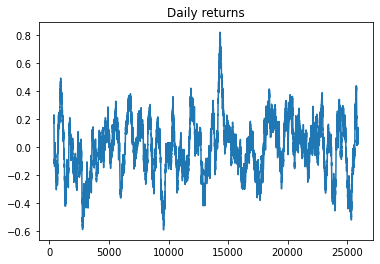

In [43]:
#(d) Visualize annualized mean and standard deviation of log-returns
(logret_day.rolling(window=365).mean()*365).plot(title="Daily returns")

<AxesSubplot:title={'center':'Weekly returns'}>

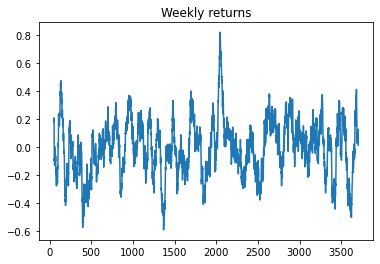

In [44]:
(logret_week.rolling(window=52).mean()*52).plot(title="Weekly returns")

<AxesSubplot:title={'center':'Monthly returns'}>

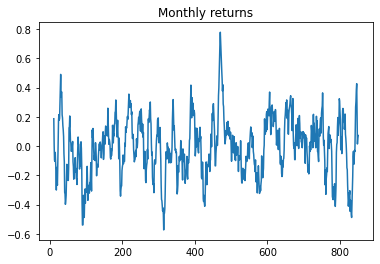

In [45]:
(logret_month.rolling(window=12).mean()*12).plot(title="Monthly returns")

<AxesSubplot:title={'center':'Daily returns'}>

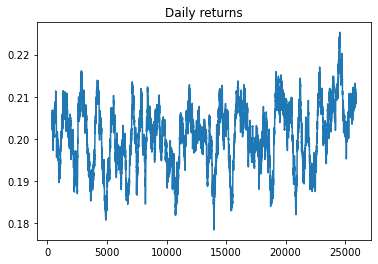

In [46]:
(logret_day.rolling(window=365).std()*np.sqrt(365)).plot(title="Daily returns")

<AxesSubplot:title={'center':'Weekly returns'}>

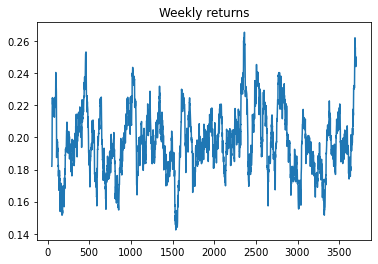

In [47]:
(logret_week.rolling(window=52).std()*np.sqrt(52)).plot(title="Weekly returns")

<AxesSubplot:title={'center':'Monthly returns'}>

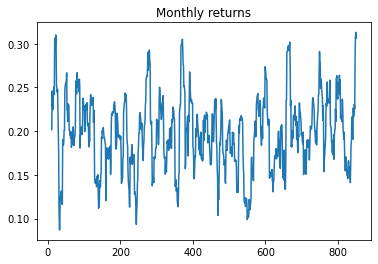

In [48]:
(logret_month.rolling(window=12).std()*np.sqrt(12)).plot(title="Monthly returns")

### (e) How does the historical variation in the annualized mean and standard deviation estimates compare across sampling frequencies?




The mean estimate does not vary accross frequencies, but its value is very noisy as is fluctuates a lot.

For the std we observe that when the timespan is shorter we obtain a more accurate estimator when we increase time we observe more noise for the estimate

In [49]:
#(f) Compare theoretical results

In [58]:
day = np.log(data.S/data.S.shift(1))

day_year = day.resample('A')
day_year_mean = day_year.mean()*365

day_squared = day * day
day_squared_year = day_squared.resample('A')
day_squared_year_var = day_squared_year.mean() * 365

month = data.resample('M',convention = 'start').first()
month = np.log(month.S/month.S.shift(1))
month_year_mean = month.resample('A').mean()*12
month_year_squared = month * month
month_year_var = month_year_squared.resample('A').mean()*12

In [63]:
print(f"The theoretical input values in our model are 0.06 for the mean and 0.04 for the variance")
print(f"The daily mean we obtain is {day_year_mean.mean()} and the associated variance is {day_year_mean.var()}")
print(f"The monthly mean is {month_year_mean.mean()} and the associated variance is {month_year_mean.var()} \n")

print(f"The theoretical daily variance value is {day_squared.mean()+0.04} and for its associated variance is {2*0.2**4/365+4*0.06**2*0.2**2/365**2} ")
print(f"The daily variance value we obtain is {day_squared_year_var.mean()} and for its associated variance is {day_squared_year_var.var()}")
print(f"The theoretical monthly variance value is {month_year_squared.mean()+0.04} and for its associated variance is {2*0.2**4/12+4*0.06**2*0.2**2/12**2}")
print(f"The monthly variance value we obtain is {month_year_var.mean()} and for its associated variance is {month_year_var.var()}")


The theoretical input values in our model are 0.06 for the mean and 0.04 for the variance
The daily mean we obtain is -0.0033544607858516516 and the associated variance is 0.030528837134146797
The monthly mean is -0.002600386338814334 and the associated variance is 0.030590313353099783 

The theoretical daily variance value is 0.040110650464507853 and for its associated variance is 8.771446800525429e-06 
The daily variance value we obtain is 0.04038694503517939 and for its associated variance is 7.901833880055783e-06
The theoretical monthly variance value is 0.043403056378320766 and for its associated variance is 0.0002706666666666667
The monthly variance value we obtain is 0.04082317885290908 and for its associated variance is 0.00027345199376148507
